In [1]:
import numpy as np
import matplotlib.pyplot as plt

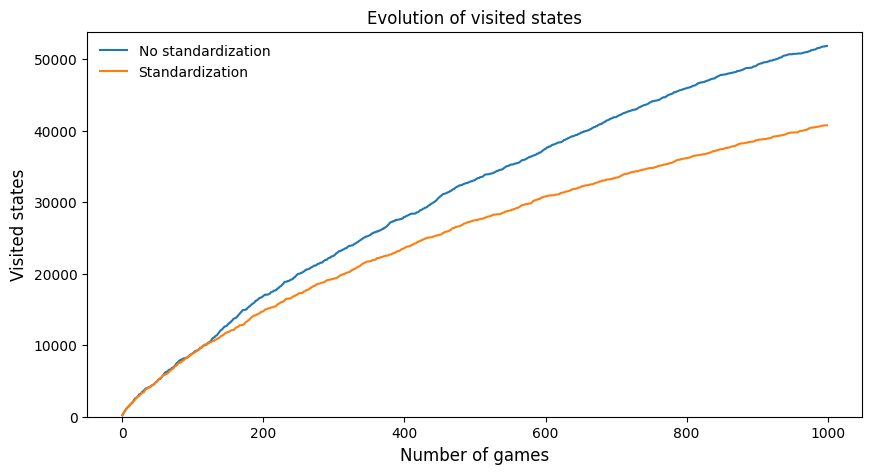

In [45]:
no_sym = np.loadtxt("agent_code/report_agent/visited_states_nosym1000.txt")
sym = np.loadtxt("agent_code/report_agent/visited_states_sym1000.txt")

plt.gcf().set_size_inches(10, 5)
plt.title("Evolution of visited states")
plt.xlabel("Number of games", fontsize=12)
plt.ylabel("Visited states", fontsize=12)
#plt.xlim(0, 1100)
plt.ylim(0, np.max(no_sym)+2000)
plt.plot(no_sym, label="No standardization")
plt.plot(sym, label="Standardization")
rounds = np.arange(0, 1000)
#plt.plot(200 * rounds)
# Legent in top left
plt.legend(frameon=False, loc="upper left")
# Save with small margins
plt.savefig("plots/visited_states.pdf", bbox_inches="tight")
plt.show()

SARSA average score:3.3866666666666667 +- 0.15723820099407093
Q_learning average score:3.1866666666666665 +- 0.14520279560618607


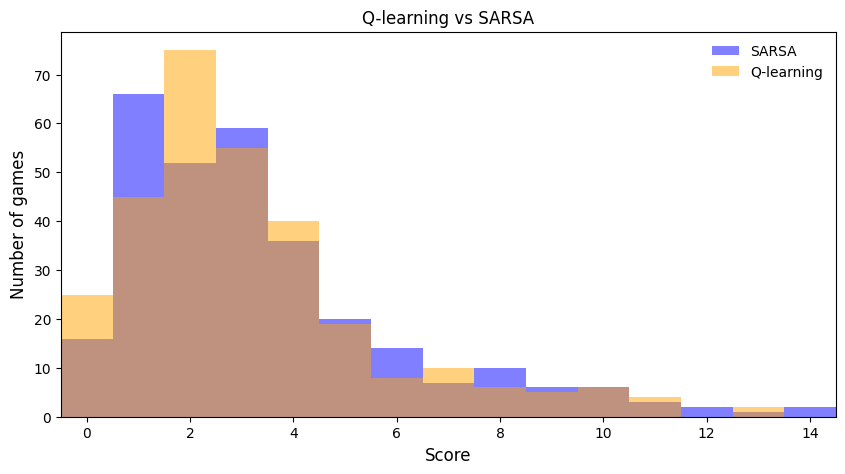

In [44]:
sarsa = np.loadtxt("agent_code/report_agent/evaluation/experiment3/scores.txt")
nosarsa = np.loadtxt("agent_code/report_agent/evaluation/experiment4/scores.txt")
#print(max(sarsa), max(nosarsa))

sarsa_avg = np.mean(sarsa)
nosarsa_avg = np.mean(nosarsa)

print(f"SARSA average score:{sarsa_avg} +- {np.std(sarsa)/np.sqrt(len(sarsa))}")
print(f"Q_learning average score:{nosarsa_avg} +- {np.std(nosarsa)/np.sqrt(len(nosarsa))}")

plt.gcf().set_size_inches(10, 5)

plt.title("Q-learning vs SARSA")
plt.xlabel("Score", fontsize=12)
plt.ylabel("Number of games", fontsize=12)

plt.xlim(-0.5, 14.5)

plt.hist(sarsa, label="SARSA", bins = 15, range=(-0.5, 14.5), alpha=0.5, color="blue")
plt.hist(nosarsa, label="Q-learning", bins = 15, range=(-0.5, 14.5), alpha=0.5, color="orange")

# Legent in top left
plt.legend(frameon=False, loc="upper right")
# Save with small margins
plt.savefig("plots/sarsa.pdf", bbox_inches="tight")
plt.show()

our coin average:5.22 +- 0.08172637273242953
rule coin average:4.31 +- 0.06514445486762475


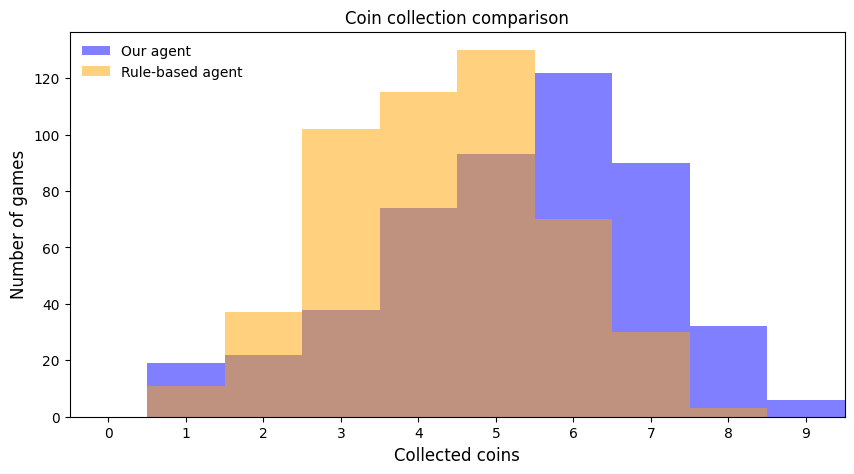

In [43]:
coins_rule = np.loadtxt("agent_code/rule_based_agent/evaluation/experiment0/scores.txt")
coins_ours = np.loadtxt("agent_code/report_agent/evaluation/experiment1/scores.txt")

print(f"our coin average:{coins_ours.mean()} +- {np.std(coins_ours)/np.sqrt(len(coins_ours))}")
print(f"rule coin average:{coins_rule.mean()} +- {np.std(coins_rule)/np.sqrt(len(coins_rule))}")


# Plot both histograms on the same figure
plt.gcf().set_size_inches(10, 5)

plt.title("Coin collection comparison")
plt.xlabel("Collected coins", fontsize=12)
plt.ylabel("Number of games", fontsize=12)
plt.xlim(-0.5, 9.5)
plt.xticks(range(0, 10))
# Plot histograms with 10 bins and range 0-10, thick line and alpha 0.5
plt.hist(coins_ours, label="Our agent", bins = 10, range=(0.5, 10.5), alpha=0.5, color="blue")
plt.hist(coins_rule, label="Rule-based agent", bins = 10, range=(0.5, 10.5), alpha=0.5, color="orange")

#plt.hist(coins_rule, bins = 10, range=(0, 10), histtype="step", color="orange")

#plt.hist(coins_ours, bins = 10, range=(0, 10), histtype="step", color="blue")

# Plot vertical lines with the mean
#plt.axvline(np.mean(coins_ours), color='blue', linestyle='solid', linewidth=0.5)
#plt.axvline(np.mean(coins_rule), color='orange', linestyle='solid', linewidth=0.5)
# Legent in top left
plt.legend(frameon=False, loc="upper left")
# Save with small margins
plt.savefig("plots/coin_comparison.pdf", bbox_inches="tight")
plt.show()


6084 6860


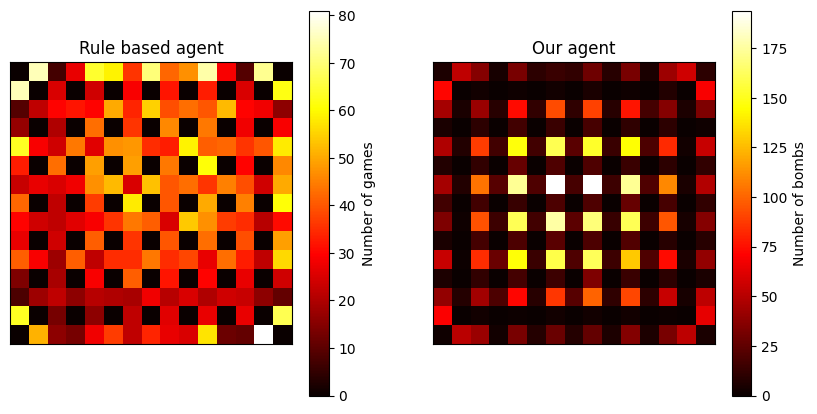

In [42]:
rule_bombs = np.loadtxt("agent_code/rule_based_agent/evaluation/experiment1/bomb_positions.txt")
rule_bombs = rule_bombs[: int(len(rule_bombs) * 3/5)]
our_bombs = np.loadtxt("agent_code/report_agent/evaluation/experiment5/bomb_positions.txt")
#print(rule_bombs.max(), rule_bombs.min())

print(len(rule_bombs), len(our_bombs))

#rule_bombs = np.array([[1,1]])


plt.subplot(1, 2, 1)



grid_size_x, grid_size_y = 15, 15

# Create a 2D histogram (heatmap) of the coordinates
heatmap, xedges, yedges = np.histogram2d(rule_bombs[:, 0], rule_bombs[:, 1], bins=[grid_size_x, grid_size_y], range=[[1, grid_size_x], [1, grid_size_y]])

# Plot the heatmap
plt.imshow(heatmap.T, origin='lower', cmap='hot', interpolation='nearest')
plt.colorbar(label='Number of games')
plt.xlabel('')
plt.ylabel('')
plt.xticks([])
plt.yticks([])

plt.title('Rule based agent')

# change size
plt.gcf().set_size_inches(10, 5)

plt.subplot(1, 2, 2)

# Remove ticks
plt.xticks([])
plt.yticks([])

grid_size_x, grid_size_y = 15, 15

# Create a 2D histogram (heatmap) of the coordinates
heatmap, xedges, yedges = np.histogram2d(our_bombs[:, 0], our_bombs[:, 1], bins=[grid_size_x, grid_size_y], range=[[1, grid_size_x], [1, grid_size_y]])

# Plot the heatmap
plt.imshow(heatmap.T, origin='lower', cmap='hot', interpolation='nearest')
plt.colorbar(label='Number of bombs')
plt.xlabel('')
plt.ylabel('')
plt.title('Our agent')


plt.savefig("plots/bomb_heatmap.pdf", bbox_inches="tight")
plt.show()


Regression with weights average score:3.3866666666666667 +- 0.15723820099407093
Regression with no weights average: 3.006666666666667 +- 0.13896389086004668


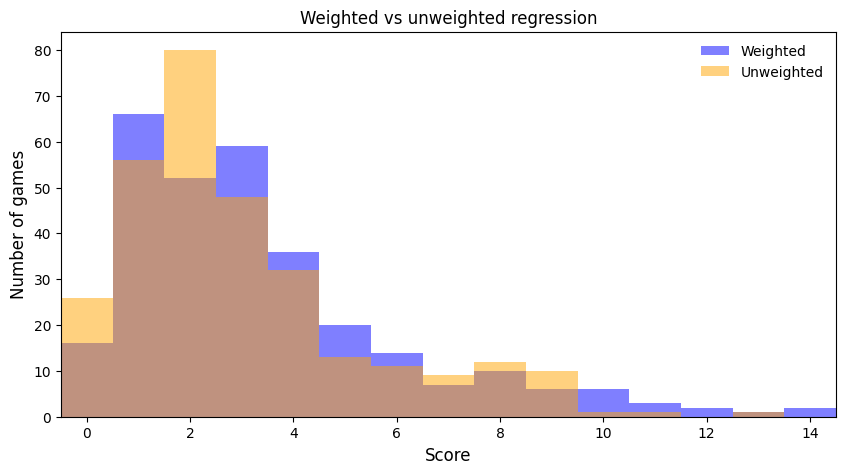

In [41]:
weights = np.loadtxt("agent_code/report_agent/evaluation/experiment3/scores.txt")
noweights = np.loadtxt("agent_code/report_agent/evaluation/experiment7/scores.txt")

error_weights = np.std(weights)/np.sqrt(len(weights))
error_noweights = np.std(noweights)/np.sqrt(len(noweights))

print(f"Regression with weights average score:{weights.mean()} +- {error_weights}")
print(f"Regression with no weights average: {noweights.mean()} +- {error_noweights}")


# size
plt.gcf().set_size_inches(10, 5)
plt.title("Weighted vs unweighted regression")
plt.xlabel("Score", fontsize=12)
plt.ylabel("Number of games", fontsize=12)
plt.xlim(-0.5, 14.5)

plt.hist(weights, label="Weighted", bins = 15, range=(-0.5, 14.5), alpha=0.5, color="blue")
plt.hist(noweights, label="Unweighted", bins = 15, range=(-0.5, 14.5), alpha=0.5, color="orange")
# Legent in top left
plt.legend(frameon=False, loc="upper right")
# Save with small margins
plt.savefig("plots/regression.pdf", bbox_inches="tight")
plt.show()

1000 1000 1000
21
2.988 0.07792211496103017
2.484 0.06448057071707725
3.654 0.08503107667200269


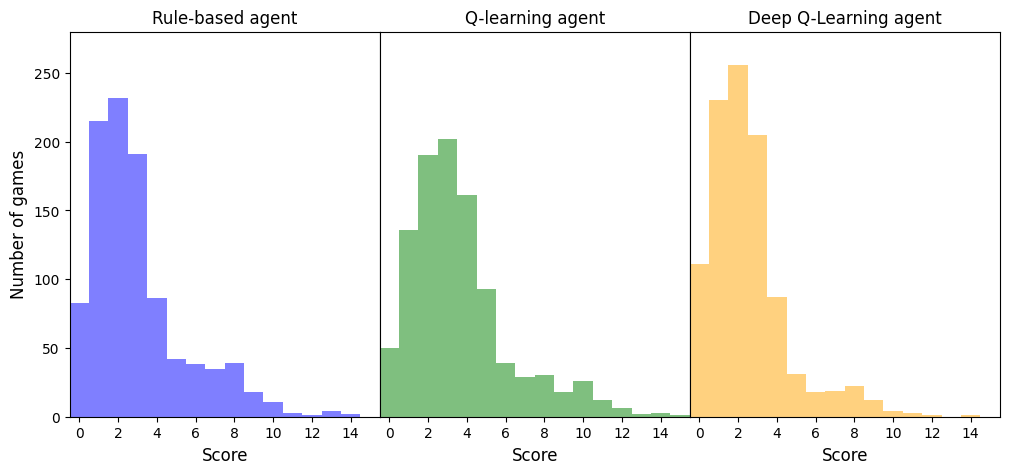

In [40]:
rule_score = np.loadtxt("agent_code/rule_based_agent/evaluation/experiment4/scores.txt")
deep_score1 = np.loadtxt("agent_code/deep_agent/evaluation/experiment3/scores.txt")
deep_score2 = np.loadtxt("agent_code/deep_agent/evaluation/experiment4/scores.txt")
deep_score3 = np.loadtxt("agent_code/deep_agent/evaluation/experiment5/scores.txt")
deep_score = np.concatenate((deep_score1, deep_score2, deep_score3))
q_score1 = np.loadtxt("agent_code/hung_ry_agent/evaluation/experiment2/scores.txt")
q_score2 = np.loadtxt("agent_code/hung_ry_agent/evaluation/experiment3/scores.txt")
q_score3 = np.loadtxt("agent_code/hung_ry_agent/evaluation/experiment4/scores.txt")
q_score = np.concatenate((q_score1, q_score2, q_score3))
print(len(rule_score), len(deep_score), len(q_score))
max = int(np.max([np.max(rule_score), np.max(deep_score), np.max(q_score)]))
print(max)
max = 15

fig, ax = plt.subplots(1,3 , figsize=(12, 5))

ax[0].set_title("Rule-based agent")
ax[2].set_title("Deep Q-Learning agent")
ax[1].set_title("Q-learning agent")
ax[0].set_ylabel("Number of games", fontsize=12)


print(rule_score.mean(), rule_score.std()/np.sqrt(len(rule_score)))
print(deep_score.mean(), deep_score.std()/np.sqrt(len(deep_score)))
print(q_score.mean(), q_score.std()/np.sqrt(len(q_score)))

# Remove space between subplots
plt.subplots_adjust(wspace=0)
ax[1].set_yticks([])
ax[2].set_yticks([])

for a in range(3):
    ax[a].set_xlabel("Score", fontsize=12)
    #ax[a].set_ylim(0, 100)
    ax[a].set_xlim(-0.5, max+0.5)
    ax[a].set_ylim(0, 280)
    ax[a].set_xticks(range(0, max+1,2))

ax[0].hist(rule_score, label="Rule-based", bins = 16, range=(-0.5, max + 0.5), alpha=0.5, color="blue")
ax[2].hist(deep_score, label="Deep Q-Learning agent", bins = 16, range=(-0.5, max + 0.5), alpha=0.5, color="orange")
ax[1].hist(q_score, label="Q-learning agent", bins = 16, range=(-0.5, max + 0.5), alpha=0.5, color="green")

plt.savefig("plots/agents_comparison.pdf", bbox_inches="tight")
plt.show()


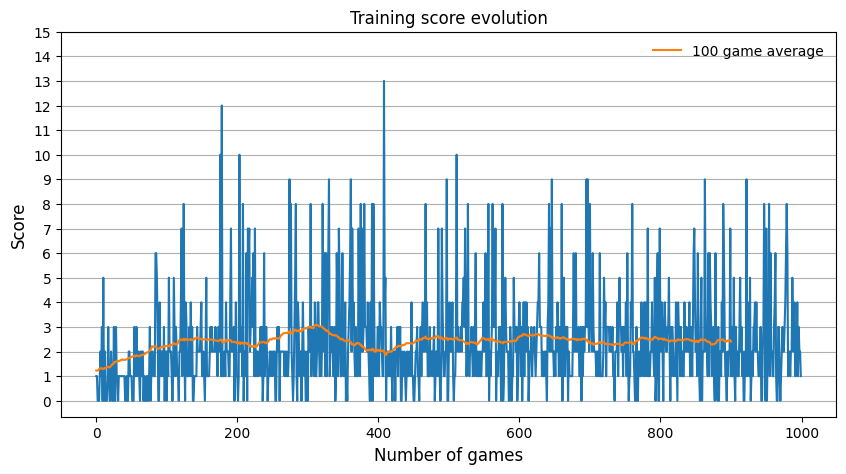

In [39]:
deep_score = np.loadtxt("agent_code/deep_agent/scores.txt")

plt.title("Training score evolution", fontsize=12)
plt.xlabel("Number of games", fontsize=12)
plt.ylabel("Score", fontsize=12)

avg_score = np.convolve(deep_score, np.ones(100)/100, mode='valid')

plt.gcf().set_size_inches(10, 5)
plt.plot(deep_score)
plt.plot(avg_score, label="100 game average")
plt.legend(frameon=False, loc="upper right")

plt.yticks(range(16))
plt.grid(axis='y')

plt.savefig("plots/deep_training.pdf", bbox_inches="tight")
